In [22]:
import numpy as np  #linear algebra
import pandas as pd  #data processing
import matplotlib.pyplot as plt  #data visualization
import seaborn as sns  #data visualization
from sklearn.metrics import accuracy_score

In [10]:
# Reading the dataset
from google.colab import drive
drive.mount('/content/drive')
df=pd.read_csv('/content/drive/MyDrive/Dataset/wine.csv')
#df.info()  #basic info about the dataset
#df.head(10)  #first 10 lines of the data
df.shape  #rows and columns of the dataset
df.quality.unique()

array(['bad', 'good'], dtype=object)

In [11]:
# Encoding the quality class
df['quality_cat'] = df.quality.map({'bad':0,'good':1})

In [12]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
quality_cat             0
dtype: int64

In [13]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol quality  quality_cat  
0      9.4     bad            0  
1      9.8     bad            0  
2      9.8     bad            0  
3      9.8    good            1  
4      9.4     bad            0

Exploratory Data Analysis and Visualizations

<Axes: title={'center': 'Quality'}, xlabel='quality', ylabel='count'>

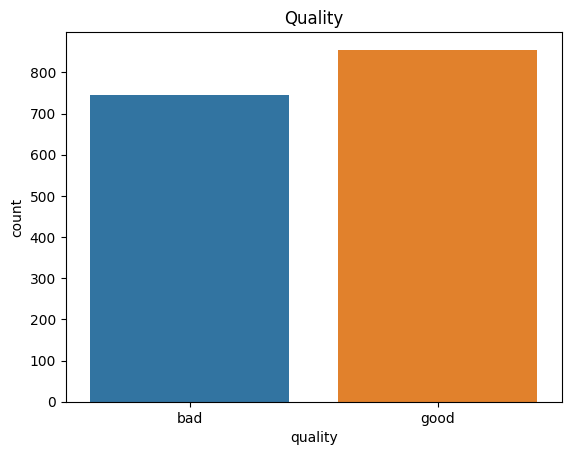

In [14]:
plt.xlabel("Good or Bad")
plt.ylabel("Count")
plt.title("Quality")
sns.countplot(x=df.quality)

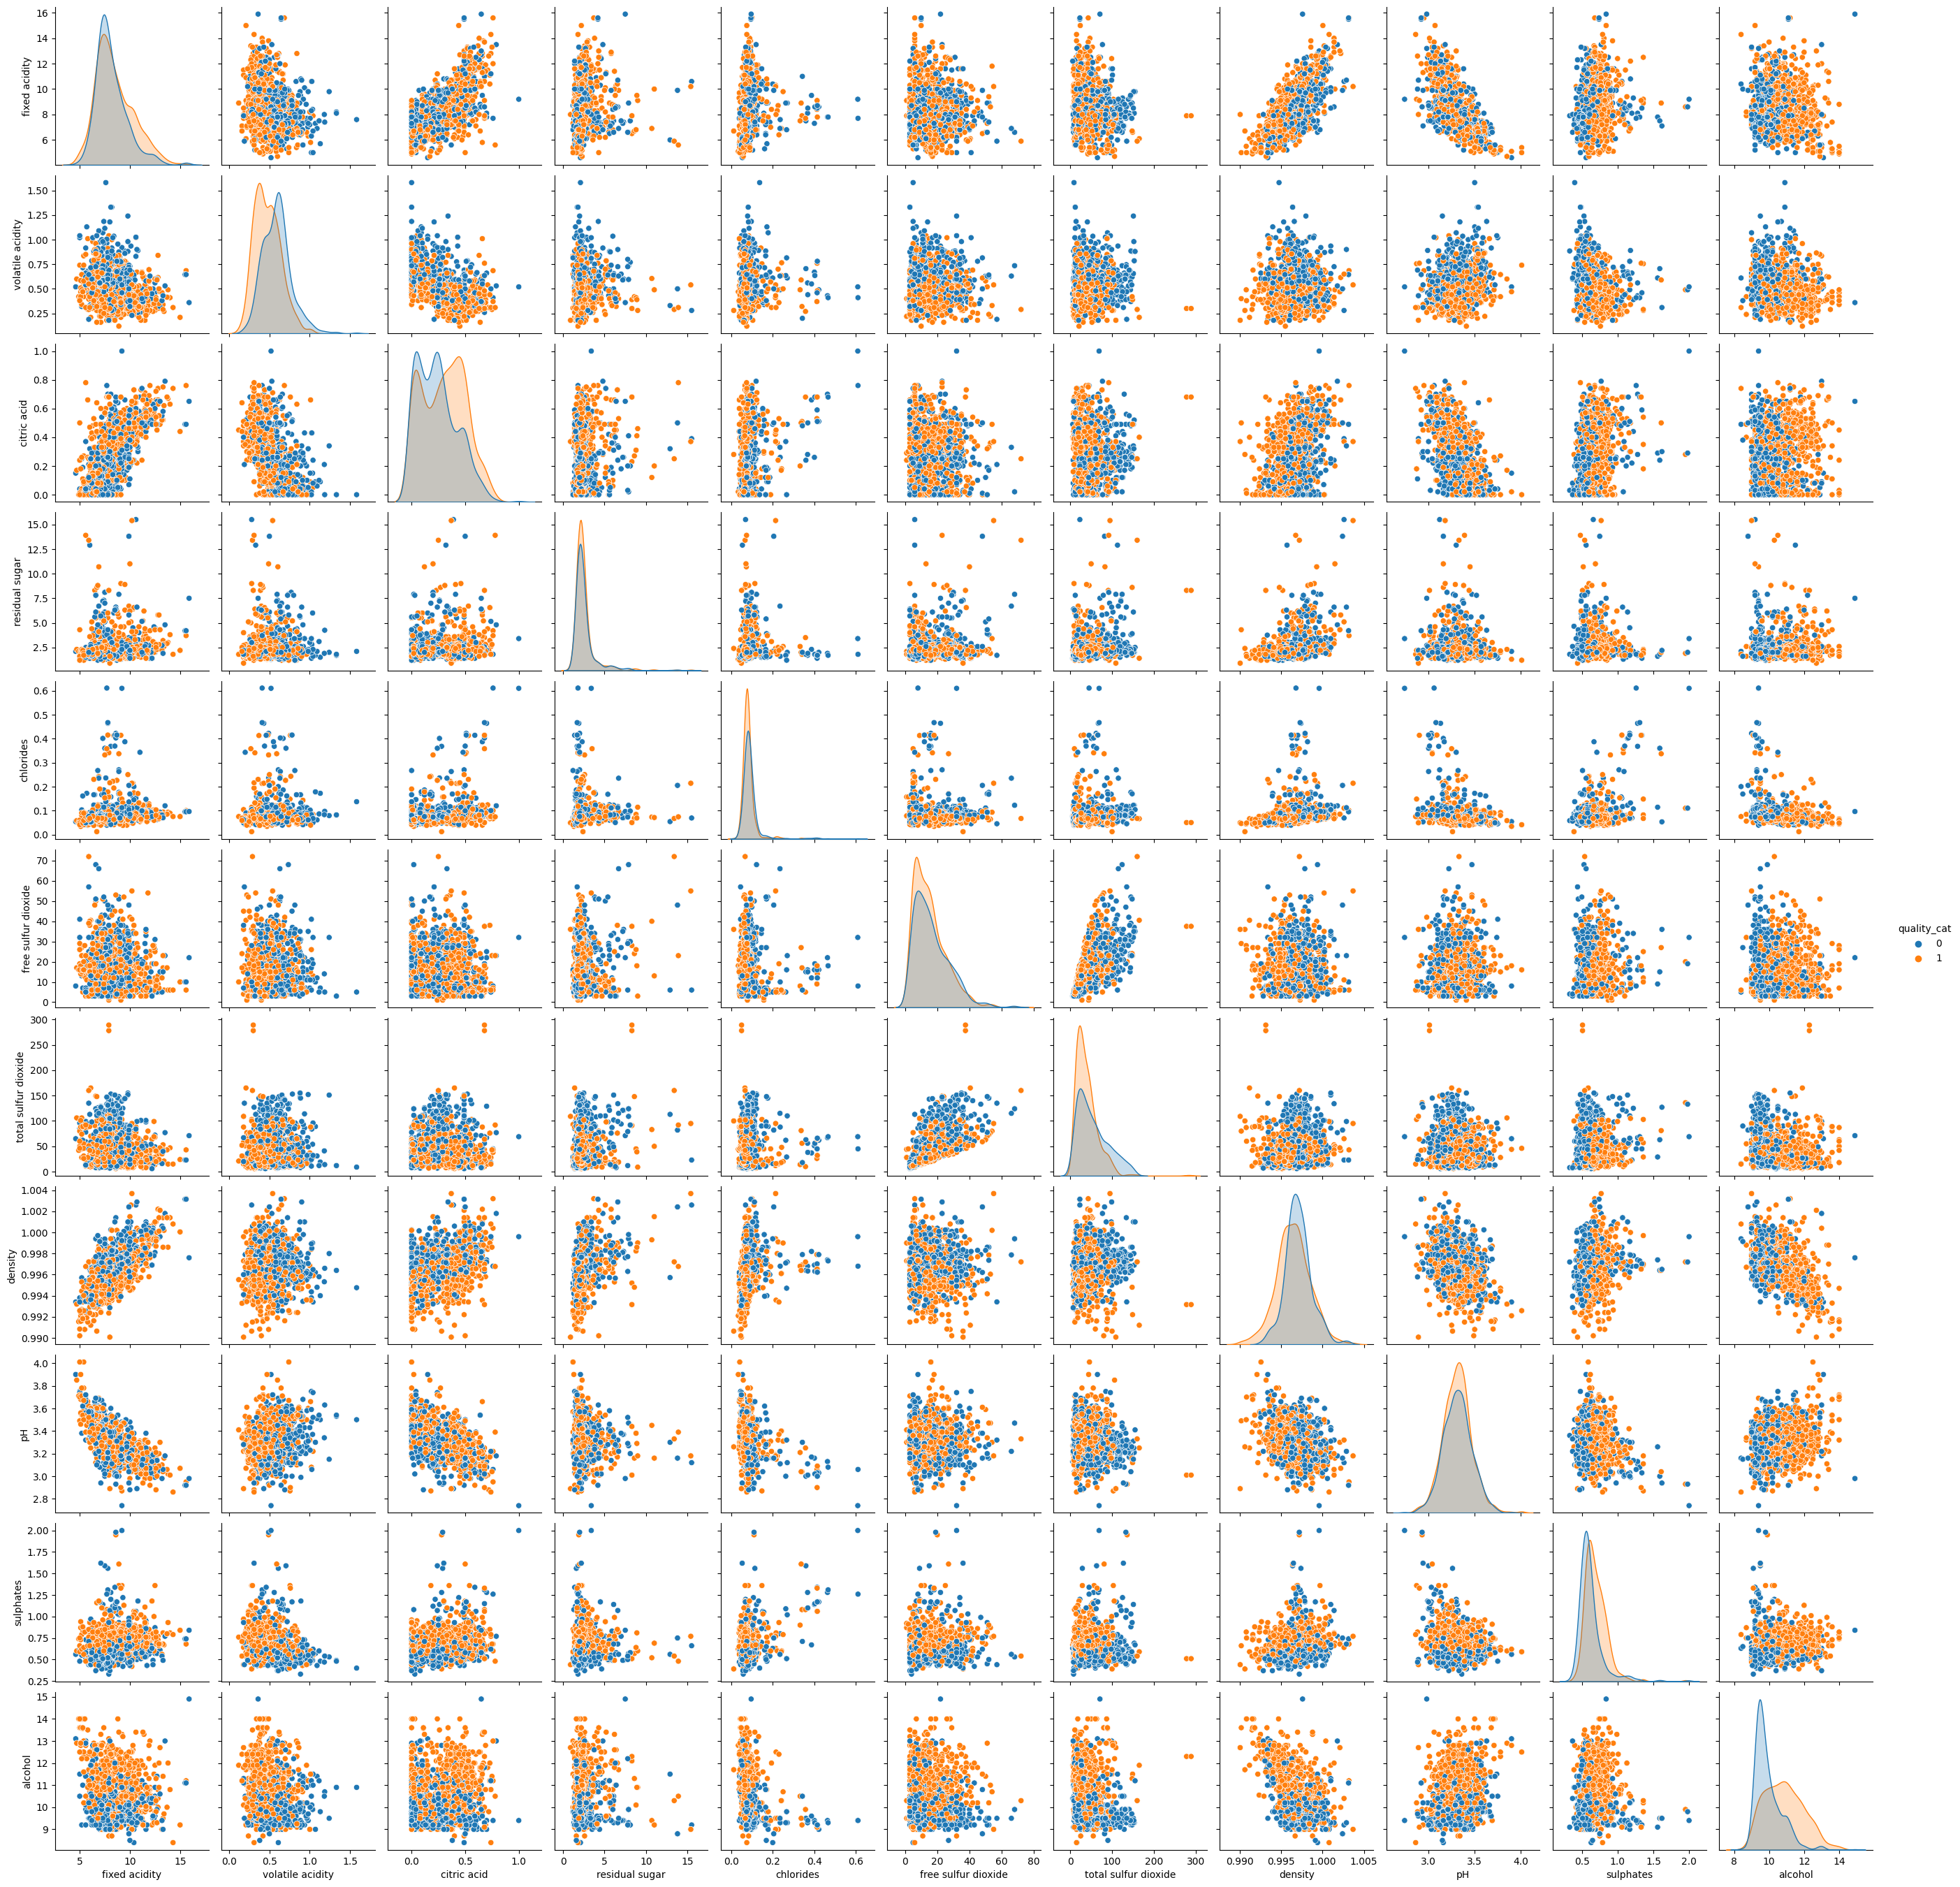

In [15]:
sns.pairplot(df,hue='quality_cat')

<ipython-input-16-ebaab4eb888e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

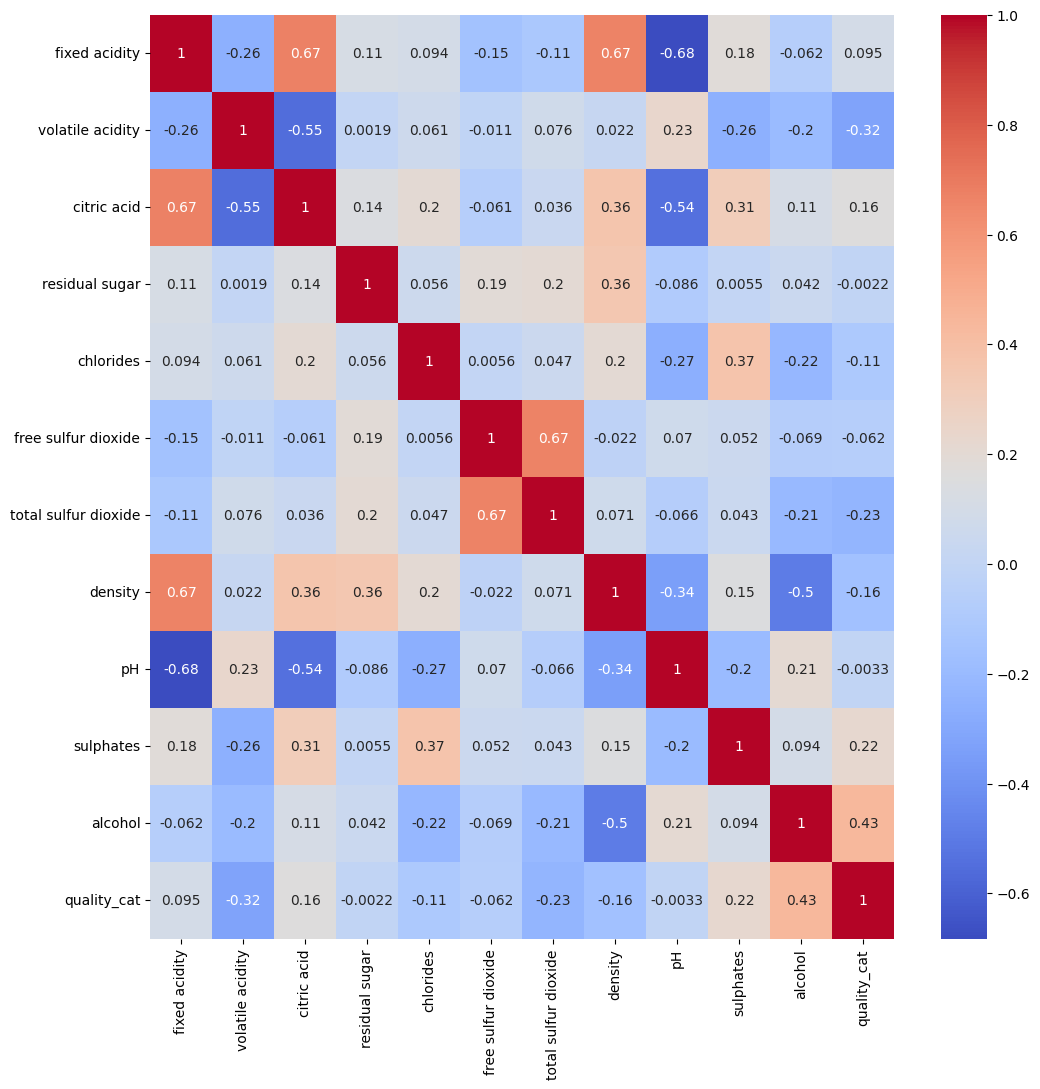

In [16]:
# Plotting the correlation matrix
corr = df.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr, cmap='coolwarm',annot=True)

In [17]:
#dropping the quality column
df.drop('quality',axis=1,inplace=True)

In [18]:
X = df.drop('quality_cat',axis=1)
y = df.quality_cat

In [28]:
#splitting the dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [29]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1119, 11)
(480, 11)
(1119,)
(480,)


In [30]:
#scaling the dataset
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

Decision Tree

In [31]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc

DecisionTreeClassifier()

In [32]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [33]:
# Checking accuracy score for training set
dtc.score(X_train,y_train)

1.0

In [34]:
# Accuracy Score for test set
dtc.score(X_test,y_test)

0.7041666666666667

<Axes: >

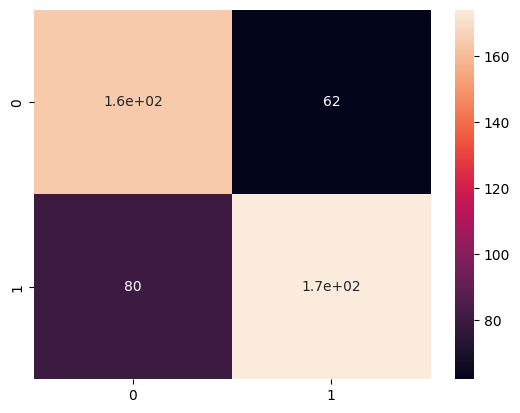

In [35]:
#Plotting the confusion matrix for this model
from sklearn.metrics import confusion_matrix
pred = dtc.predict(X_test)
cm = confusion_matrix(y_test,pred)
sns.heatmap(cm,annot=True)

In [36]:
# Classification report
from sklearn.metrics import classification_report
target_names = ['Bad', 'Good']
print(classification_report(y_test, pred, target_names=target_names))

              precision    recall  f1-score   support

         Bad       0.67      0.73      0.70       226
        Good       0.74      0.69      0.71       254

    accuracy                           0.70       480
   macro avg       0.70      0.71      0.70       480
weighted avg       0.71      0.70      0.70       480



In [38]:
# Improving the accuracy by tuning the hyperparameters
dtc1 = DecisionTreeClassifier(max_depth=4,max_leaf_nodes=12)
dtc1.fit(X_train,y_train)
print(f"{dtc1.score(X_train,y_train)}")
print(f"{dtc1.score(X_test,y_test)}")

0.7649687220732797
0.7083333333333334


In [40]:
# Checking the cross val score for this model
from sklearn.model_selection import cross_val_score
print(cross_val_score(dtc1,X,y,cv=10).mean())

0.7029441823899371


Random Forest Classifier

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
rfc1 = RandomForestClassifier()
rfc1
RandomForestClassifier()

RandomForestClassifier()

In [44]:
rfc1.fit(X_train,y_train)

RandomForestClassifier()

In [45]:
# Checking accuracy score for training set
rfc1.score(X_train,y_train)

1.0

In [46]:
# Accuracy Score for test set
rfc1.score(X_test,y_test)

0.775

In [47]:
# Checking the cross val score for this model
from sklearn.model_selection import cross_val_score
print(cross_val_score(rfc1,X,y,cv=10).mean())

0.7248073899371069


In [48]:
#feature selection using random forest
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier())

In [49]:
selected_feat= X.columns[(sel.get_support())]
print(selected_feat)

Index(['volatile acidity', 'total sulfur dioxide', 'sulphates', 'alcohol'], dtype='object')


In [50]:
rfc2 = RandomForestClassifier(max_depth= 110,max_features=3,min_samples_leaf=3,min_samples_split= 10,
 n_estimators= 200)
rfc2.fit(X_train,y_train)

RandomForestClassifier(max_depth=110, max_features=3, min_samples_leaf=3,
                       min_samples_split=10, n_estimators=200)

In [51]:
# Accuracy score for the training set
rfc2.score(X_train,y_train)

0.9445933869526363

In [52]:
# Accuracy score for test set
rfc2.score(X_test,y_test)

0.7666666666666667

<Axes: >

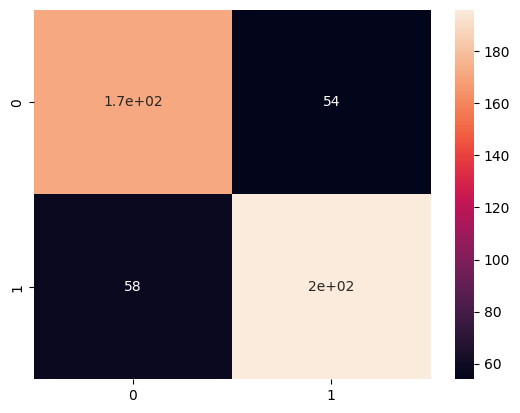

In [53]:
# Plotting the confusion matrix for this model
from sklearn.metrics import confusion_matrix
pred = rfc2.predict(X_test)
cm = confusion_matrix(y_test,pred)
sns.heatmap(cm,annot=True)